<a href="https://colab.research.google.com/github/mekhi-woods/HiloCATsSN1991bg/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install snpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00
  Created wheel for snpy: filename=snpy-2.5.3-cp310-cp310-linux_x86_64.whl size=36085673 sha256=80f67d2ab4611132252c0f0967279285ceda2362a2a1a4d404682f1f4d96e5e7
  Stored in directory: /root/.cache/pip/wheels/9d/76/58/9ba0dabb8a509b419704f04867bed00eb3eadc3bb8f1f8db39
Successfully built snpy


In [5]:
!git clone https://github.com/mekhi-woods/HiloCATsSN1991bg.git

Cloning into 'HiloCATsSN1991bg'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 220 (delta 20), reused 203 (delta 10), pack-reused 0
Receiving objects: 100% (220/220), 922.59 KiB | 12.81 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

FILTER_WHEEL = ['u', 'g', 'r', 'i', 'B', 'V0']

if __name__ == '__main__':
    KrisciunasPath = "targetLists\91bglike_justnames.txt"
    KrisciunasNames = np.genfromtxt(KrisciunasPath, dtype=str, delimiter=', ')

    allCPSPhot = "data\CSPdata\SN_photo.dat"
    allCPSPhotData = np.genfromtxt(allCPSPhot, dtype='str')

    names = allCPSPhotData[:,0]
    filters = allCPSPhotData[:,1]
    time = allCPSPhotData[:,2]
    light = allCPSPhotData[:,3]
    err = allCPSPhotData[:,4]

    sigma = 1
    for tar in KrisciunasNames:
        for n in range(len(FILTER_WHEEL)):
            # output_names = names[(names == tar) & (filters == FILTER_WHEEL[n])]
            output_light = light[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            output_time = time[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64') + 53000
            output_err = err[(names == tar) & (filters == FILTER_WHEEL[n])].astype('float64')
            plt.errorbar(output_time, output_light, yerr=output_err*sigma, fmt='o', label=FILTER_WHEEL[n])

        plt.title(tar); plt.xlabel('Time [MJD]'); plt.ylabel('Intensity [mag]')
        plt.gca().invert_yaxis()
        plt.legend()
        # plt.savefig('save\\'+str(tar)+'.png')
        plt.show()
        break


--------------------------------------------------------------------------------
SN  SN2005ke
z = 0.0049          ra= 53.76812         dec=-24.94411 
Data in the following bands: u,  g,  r,  i,  B,  V0,  V,  Y,  Ydw,  J,  H,  
Fit results (if any):
   dm15 = 1.046  +/-  0.023
   Tmax = 699.749  +/-  0.185  +/- 0.340 (sys)
   umax = 16.171  +/-  0.053  +/- 0.030 (sys)
   gmax = 14.668  +/-  0.035  +/- 0.014 (sys)
   rmax = 14.086  +/-  0.075  +/- 0.022 (sys)
   imax = 14.311  +/-  0.052  +/- 0.022 (sys)
   Bmax = 15.071  +/-  0.035  +/- 0.012 (sys)
   Vmax = 14.408  +/-  0.032  +/- 0.019 (sys)
   Ymax = 13.887  +/-  0.091  +/- 0.050 (sys)
   Jmax = 13.967  +/-  0.057  +/- 0.044 (sys)
   Hmax = 14.029  +/-  0.067  +/- 0.055 (sys)


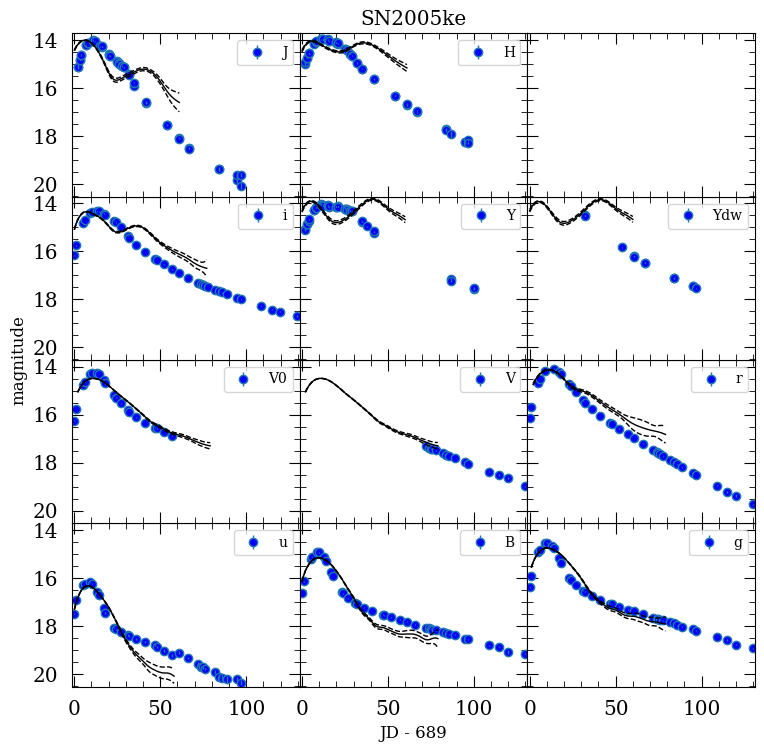

In [11]:
"""
SNooPy fitting on CSP data
"""
import matplotlib.pyplot as plt
import numpy as np
import snpy

if __name__ == '__main__':
    # Initalize File -- SN2005ke
    tarFile = '/content/HiloCATsSN1991bg/data/CSPdata/SN2005ke_snpy.txt'
    s = snpy.get_sn(tarFile)

    # Set model parameters
    model = "max_model"
    shapeParam = "dm15"
    s.choose_model(model, stype=shapeParam)
    s.set_restbands() # Auto pick appropriate rest-bands

    # Fit data
    s.fit()

    # Show results
    s.summary()
    # for param in s.parameters:
    #     print("{} = {} +/- {}".format(param, s.parameters[param], s.errors[param]))